#### AIRLINE ARRIVALS
##### Content
###### 0.Import library & Utils
###### 1.Descriptive analysis
###### 2.Apply model: Naive Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting (XGBoost,LightGBM,Cat-Boost) & SVM.
###### 3.Apply feature selection with PCA, SelectKBest, RFE.
###### 4.Using GridSearchCV to obtain best paramenters for model.
###### 5.Conclusion & comparing performance among models.

#### 0.IMPORT LIBRARY & UTILS

In [1]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Mounted at /content/drive


In [3]:
def weekday_name(x):
  if int(x)==1:
    return "Sun"
  elif int(x)==2:
    return "Mon"
  elif int(x)==3:
    return "Tue"
  elif int(x)==4:
    return "Wed"
  elif int(x)==5:
    return "Thu"
  elif int(x)==6:
    return "Fri"
  elif int(x)==7:
    return "Sat"

def weekno(x):
  if int(x)>=1 and int(x)<=7:
    return "w1"
  elif int(x)>7 and int(x)<=14:
    return "w2"
  elif int(x)>14 and int(x)<=21:
    return "w3"
  elif int(x)>21 and int(x)<=31:
    return "w4"

def season_name(x):
  if int(x)>=1 and int(x)<=3:
    return "spring"
  elif int(x)>=4 and int(x)<=6:
    return "summer"
  elif int(x)>=7 and int(x)<=9:
    return "autumn"
  elif int(x)>=10 and int(x)<=12:
    return "winter"

def col_filtering(df,col):
  list_col = ['Lattitude','Longtitude']
  if col in list_col:
    temp_list = df
    temp_list[col] = round(abs(temp_list[col]),4)
    temp_list = temp_list[temp_list[col]>0]
  else:
    temp_list = df[df[col]>0]
  return temp_list

def scaleColumns(df_scale, cols_to_scale):
    for col in cols_to_scale:
      minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
      df_scale[col] = pd.DataFrame(minmax_scaler.fit_transform(pd.DataFrame(df_scale[col])),columns=[col])
      df_scale[col].fillna(0,inplace=True)
    return df_scale

#### 1.DESCRIPTIVE ANALYSIS
#####+ Import data.
#####+ Draftly stats on flight frequency.
#####+ Handle missing value & transform catgorical vars.
#####+ Check correlation & distribution & outlier.

###### Import data

In [4]:
os.getcwd()
df1 = pd.read_csv('drive/My Drive/assign5_aa/airline_arrival1.csv')
df2 = pd.read_csv('drive/My Drive/assign5_aa/airline_arrival2.csv')
df_ = pd.concat([df1,df2])
del df1
del df2
df_.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,69,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3634338, 110)

In [5]:
df_.drop(df_.iloc[:, 77:110], inplace=True, axis=1)

In [6]:
df3 = pd.read_csv('drive/My Drive/assign5_aa/airline_arrival3.csv')
df3.drop(df3.iloc[:, 77:110], inplace=True, axis=1)
df__ = pd.concat([df_,df3])
del df3
del df_
df__.shape
df__.info(verbose=True,null_counts=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,69,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5557807 entries, 0 to 1923468
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             5557807 non-null  int64  
 1   Quarter                          5557807 non-null  int64  
 2   Month                            5557807 non-null  int64  
 3   DayofMonth                       5557807 non-null  int64  
 4   DayOfWeek                        5557807 non-null  int64  
 5   FlightDate                       5557807 non-null  object 
 6   Reporting_Airline                5557807 non-null  object 
 7   DOT_ID_Reporting_Airline         5557807 non-null  int64  
 8   IATA_CODE_Reporting_Airline      5557807 non-null  object 
 9   Tail_Number                      5541392 non-null  object 
 10  Flight_Number_Reporting_Airline  5557807 non-null  int64  
 11  OriginAirportID                  5557807 non-null 

In [7]:
df4 = pd.read_csv('drive/My Drive/assign5_aa/airline_arrival4.csv')
df4.drop(df4.iloc[:, 77:110], inplace=True, axis=1)
df = pd.concat([df__,df4])
del df4
del df__
df.info(verbose=True,null_counts=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,69,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422037 entries, 0 to 1864229
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             7422037 non-null  int64  
 1   Quarter                          7422037 non-null  int64  
 2   Month                            7422037 non-null  int64  
 3   DayofMonth                       7422037 non-null  int64  
 4   DayOfWeek                        7422037 non-null  int64  
 5   FlightDate                       7422037 non-null  object 
 6   Reporting_Airline                7422037 non-null  object 
 7   DOT_ID_Reporting_Airline         7422037 non-null  int64  
 8   IATA_CODE_Reporting_Airline      7422037 non-null  object 
 9   Tail_Number                      7404200 non-null  object 
 10  Flight_Number_Reporting_Airline  7422037 non-null  int64  
 11  OriginAirportID                  7422037 non-null 

###### Draftly stats on flight frequency.

In [8]:
# re-screen all columns to remove duplicated with different format and pick target vars
df = df[['ArrDelay','Cancelled','Diverted','ActualElapsedTime','CRSArrTime','ArrTime','DepTime','CRSDepTime',
           'DepDelay','Cancelled','Month','DayofMonth','DayOfWeek','Distance',
           'Reporting_Airline','Origin','Dest','SecurityDelay','NASDelay','LateAircraftDelay',
           'WeatherDelay','CarrierDelay','TaxiIn','TaxiOut']]
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422037 entries, 0 to 1864229
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ArrDelay           7268232 non-null  float64
 1   Cancelled          7422037 non-null  int64  
 2   Diverted           7422037 non-null  int64  
 3   ActualElapsedTime  7268232 non-null  float64
 4   CRSArrTime         7422037 non-null  int64  
 5   ArrTime            7284391 non-null  float64
 6   DepTime            7291951 non-null  float64
 7   CRSDepTime         7422037 non-null  int64  
 8   DepDelay           7291927 non-null  float64
 9   Cancelled          7422037 non-null  int64  
 10  Month              7422037 non-null  int64  
 11  DayofMonth         7422037 non-null  int64  
 12  DayOfWeek          7422037 non-null  int64  
 13  Distance           7422037 non-null  int64  
 14  Reporting_Airline  7422037 non-null  object 
 15  Origin             7422037 non-n

In [ ]:
df.head(10)

,ArrDelay,Cancelled,Diverted,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,DepDelay,Cancelled,Month,DayofMonth,DayOfWeek,Distance,Reporting_Airline,Origin,Dest,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay,TaxiIn,TaxiOut
0,-26.0,0,0,51.0,1510,1444.0,1353.0,1400,-7.0,0,1,4,5,190,OO,SBP,SFO,NaN,NaN,NaN,NaN,NaN,5.0,9.0
1,1.0,0,0,109.0,1118,1119.0,930.0,935,-5.0,0,1,4,5,438,OO,IAH,XNA,NaN,NaN,NaN,NaN,NaN,6.0,27.0
2,-17.0,0,0,121.0,855,838.0,637.0,643,-6.0,0,1,4,5,513,OO,SGF,IAH,NaN,NaN,NaN,NaN,NaN,16.0,17.0
3,-29.0,0,0,110.0,1433,1404.0,1314.0,1335,-21.0,0,1,4,5,576,OO,ISN,DEN,NaN,NaN,NaN,NaN,NaN,7.0,23.0
4,-31.0,0,0,163.0,1040,1009.0,826.0,836,-10.0,0,1,4,5,896,OO,MKE,DEN,NaN,NaN,NaN,NaN,NaN,10.0,26.0
5,-12.0,0,0,134.0,1826,1814.0,1600.0,1610,-10.0,0,1,4,5,679,OO,SEA,SFO,NaN,NaN,NaN,NaN,NaN,3.0,21.0
6,3.0,0,0,105.0,1856,1859.0,1614.0,1615,-1.0,0,1,4,5,522,OO,SFO,BOI,NaN,NaN,NaN,NaN,NaN,4.0,29.0
7,-14.0,0,0,93.0,1240,1226.0,1053.0,1045,8.0,0,1,4,5,524,OO,BZN,DEN,NaN,NaN,NaN,NaN,NaN,8.0,14.0
8,-2.0,0,0,85.0,751,749.0,624.0,637,-13.0,0,1,4,5,190,OO,SBP,SFO,NaN,NaN,NaN,NaN,NaN,4.0,44.0
9,1.0,0,0,129.0,1107,1108.0,759.0,803,-4.0,0,1,4,5,641,OO,DEN,DFW,NaN,NaN,NaN,NaN,NaN,15.0,19.0


In [ ]:
df.describe()

,ArrDelay,Cancelled,Diverted,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,DepDelay,Cancelled,Month,DayofMonth,DayOfWeek,Distance,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay,TaxiIn,TaxiOut
count,7.268232e+06,7.422037e+06,7.422037e+06,7.268232e+06,7.422037e+06,7.284391e+06,7.291951e+06,7.422037e+06,7.291927e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,7.284390e+06,7.288060e+06
mean,5.414849e+00,1.817897e-02,2.543776e-03,1.366903e+02,1.485790e+03,1.462955e+03,1.334606e+03,1.330259e+03,1.092327e+01,1.817897e-02,6.578750e+00,1.573196e+01,3.937155e+00,8.005442e+02,9.608329e-02,1.658795e+01,2.740748e+01,3.802404e+00,2.112859e+01,7.740776e+00,1.738935e+01
std,5.106666e+01,1.335983e-01,5.037167e-02,7.261274e+01,5.214659e+02,5.424542e+02,5.071998e+02,4.929855e+02,4.895964e+01,1.335983e-01,3.402585e+00,8.762183e+00,1.995814e+00,5.925118e+02,3.358346e+00,3.966440e+01,5.345620e+01,3.236297e+01,6.610465e+01,6.194340e+00,1.000398e+01
min,-9.900000e+01,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,-1.500000e+01,0.000000e+00,0.000000e+00,8.400000e+01,1.100000e+03,1.046000e+03,9.140000e+02,9.130000e+02,-5.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,3.690000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.100000e+01
50%,-6.000000e+00,0.000000e+00,0.000000e+00,1.190000e+02,1.515000e+03,1.504000e+03,1.327000e+03,1.321000e+03,-2.000000e+00,0.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,6.400000e+02,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.500000e+01
75%,7.000000e+00,0.000000e+00,0.000000e+00,1.670000e+02,1.921000e+03,1.917000e+03,1.746000e+03,1.736000e+03,7.000000e+00,0.000000e+00,1.000000e+01,2.300000e+01,6.000000e+00,1.034000e+03,0.000000e+00,2.000000e+01,3.300000e+01,0.000000e+00,1.800000e+01,9.000000e+00,2.000000e+01
max,2.695000e+03,1.000000e+00,1.000000e+00,1.604000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.359000e+03,2.710000e+03,1.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,5.095000e+03,1.078000e+03,1.741000e+03,2.206000e+03,1.847000e+03,2.695000e+03,3.160000e+02,2.270000e+02


In [ ]:
pd.crosstab(df['Month'],df['Reporting_Airline'])

Reporting_Airline,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX
Month,,,,,,,,,,,,,,,,,
1,20198,77017,20744,24443,73836,13195,9647,6763,6798,25699,15222,23169,64926,46915,111312,18346,25755
2,18305,71059,19028,22398,67337,11447,8750,7271,6033,23312,13654,21465,59589,43722,99500,16519,23786
3,22377,80027,21694,25927,84208,12942,9845,10260,6858,26740,17154,24446,70419,53651,119413,18836,27277
4,21030,76765,21300,25329,81949,11300,9819,9283,6900,26176,16774,23984,68502,52292,115401,18171,27048
5,21074,81666,22567,24967,85579,9290,11383,9021,7219,28795,18055,24783,72041,54360,117849,19594,28147
6,21882,80090,23271,24324,87350,9786,11647,11091,7198,28456,17874,24681,72158,54075,115213,19924,27671
7,22312,81801,24593,25545,90812,11182,12535,11786,7334,29565,18845,25249,73742,56106,119342,20122,28158
8,23338,82689,24688,25518,91278,11348,12454,8717,7364,29931,18860,25452,74973,56223,116526,20105,28997
9,20912,77663,21737,24143,81745,11386,12200,5726,6876,27249,16759,23683,68051,52021,109217,19099,27512


In [ ]:
df["Month"].value_counts()

7     659029
8     658461
6     636691
5     636390
10    636014
3     632074
12    625763
4     612023
9     605979
11    602453
1     583985
2     533175
Name: Month, dtype: int64

In [ ]:
df["Dest"].value_counts()

ATL    395026
ORD    339569
DFW    304346
DEN    252064
CLT    235490
        ...  
HYA        83
GST        82
DLG        82
PGV        80
AKN        61
Name: Dest, Length: 360, dtype: int64

In [ ]:
df["Dest"].value_counts()

ATL    395026
ORD    339569
DFW    304346
DEN    252064
CLT    235490
        ...  
HYA        83
GST        82
DLG        82
PGV        80
AKN        61
Name: Dest, Length: 360, dtype: int64

##### Dralfly on what the stats show:
##### 1. Most of airline have stable in flight frequency thourgh month in which WN is dominated among airlines.Additionally,G4 (Allegiant air) showing the unstability on number of flight.
##### 2. ATL/ORD/DFW are the top airport in term of flight frequency for both destinition and departure. (maybe impact to number of delay)

###### Handle missing value & transform catgorical data

In [ ]:
df.isnull().sum()/(df.shape[0])

ArrDelay             0.020723
Cancelled            0.000000
Diverted             0.000000
ActualElapsedTime    0.020723
CRSArrTime           0.000000
ArrTime              0.018546
DepTime              0.017527
CRSDepTime           0.000000
DepDelay             0.017530
Cancelled            0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
Distance             0.000000
Reporting_Airline    0.000000
Origin               0.000000
Dest                 0.000000
SecurityDelay        0.812821
NASDelay             0.812821
LateAircraftDelay    0.812821
WeatherDelay         0.812821
CarrierDelay         0.812821
TaxiIn               0.018546
TaxiOut              0.018051
dtype: float64

######> Targeted variable [ArrDelay] have ~2% missing value -> drop null-value rows
######> Other variables with small percentage of missing value (<2%) like ActualElaspsedTime, ArrTime, DepTime, DepDelay, TaxiIn, TaxiOut will be droped on NA rows as well 
######> For variables related to delay like SecurityDelay,.. will be fill as 0 since its nature will be based on ArrDelay and whether flight delay or not.

In [9]:
drop_missing_row = ['ArrDelay','ActualElapsedTime','ArrTime','DepTime','DepDelay','TaxiIn','TaxiOut']
for c in drop_missing_row:
  df.drop(df[df[c].isnull()].index, inplace=True)
# df.info(verbose=True,null_counts=True)
# print(df.shape)

In [10]:
fill_na_row = ['SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay','CarrierDelay']
for c in fill_na_row:
  df[c] = df[c].fillna(0).astype(int)
  df[c].fillna(0, inplace=True)

df.info(verbose=True,null_counts=True)
print(df.shape)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6834910 entries, 0 to 1864229
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ArrDelay           6834910 non-null  float64
 1   Cancelled          6834910 non-null  int64  
 2   Diverted           6834910 non-null  int64  
 3   ActualElapsedTime  6834910 non-null  float64
 4   CRSArrTime         6834910 non-null  int64  
 5   ArrTime            6834910 non-null  float64
 6   DepTime            6834910 non-null  float64
 7   CRSDepTime         6834910 non-null  int64  
 8   DepDelay           6834910 non-null  float64
 9   Cancelled          6834910 non-null  int64  
 10  Month              6834910 non-null  int64  
 11  DayofMonth         6834910 non-null  int64  
 12  DayOfWeek          6834910 non-null  int64  
 13  Distance           6834910 non-null  int64  
 14  Reporting_Airline  6834910 non-null  object 
 15  Origin             6834910 non-n

In [11]:
# Handle catgorical data & datetime
### for categorical date with multiple class -> cut down the group 
### for datetime value -> create new group with season, weekday, week of month
df['weekday'] = df['DayOfWeek'].apply(lambda x: weekday_name(x))
df['weekno'] = df['DayofMonth'].apply(lambda x: weekno(x))
df['season'] = df['Month'].apply(lambda x: season_name(x))

In [ ]:
df.describe(include=['O'])

,Reporting_Airline,Origin,Dest,weekday,weekno,season
count,6834910,6834910,6834910,6834910,6834910,6834910
unique,17,360,360,7,4,4
top,WN,ATL,ATL,Thu,w4,autumn
freq,1243831,369458,369586,1022301,2108261,1774231


In [12]:
df.drop(['DayOfWeek','DayofMonth','Month'],axis=1,inplace=True)
df.columns

Index(['ArrDelay', 'Cancelled', 'Diverted', 'ActualElapsedTime', 'CRSArrTime',
       'ArrTime', 'DepTime', 'CRSDepTime', 'DepDelay', 'Cancelled', 'Distance',
       'Reporting_Airline', 'Origin', 'Dest', 'SecurityDelay', 'NASDelay',
       'LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'TaxiIn',
       'TaxiOut', 'weekday', 'weekno', 'season'],
      dtype='object')

==========Reporting_Airline==========
             counts
count  1.700000e+01
mean   4.020535e+05
std    3.469732e+05
min    7.974400e+04
25%    1.874460e+05
50%    2.643510e+05
75%    5.847720e+05
max    1.243831e+06


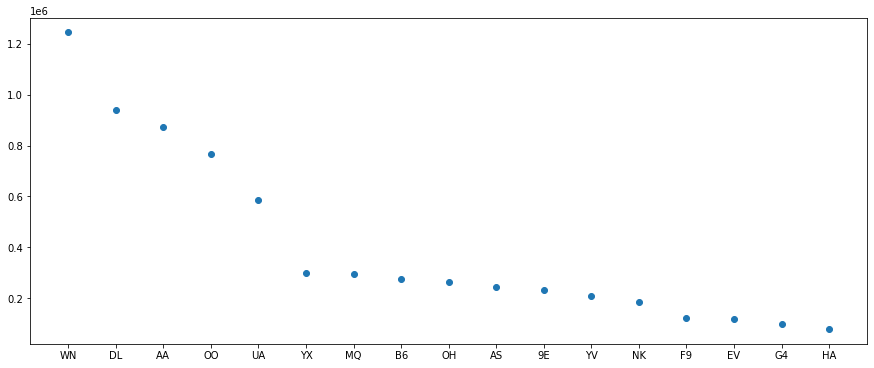

==========Origin==========
              counts
count     360.000000
mean    18985.861111
std     45402.263193
min        55.000000
25%       886.750000
50%      2814.500000
75%     11546.000000
max    369458.000000


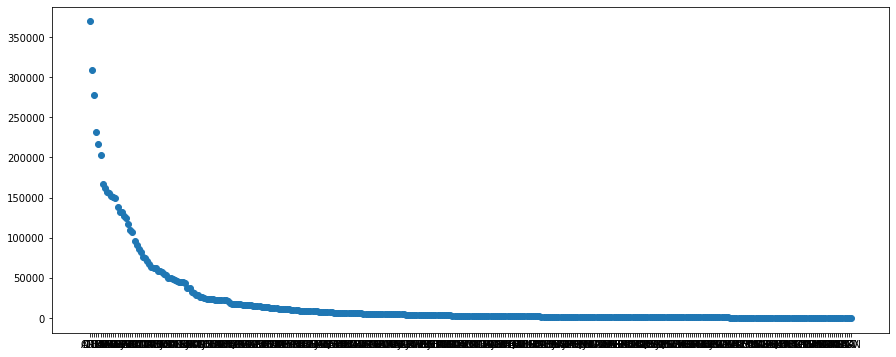

==========Dest==========
              counts
count     360.000000
mean    18985.861111
std     45383.113281
min        58.000000
25%       891.250000
50%      2810.500000
75%     11579.750000
max    369586.000000


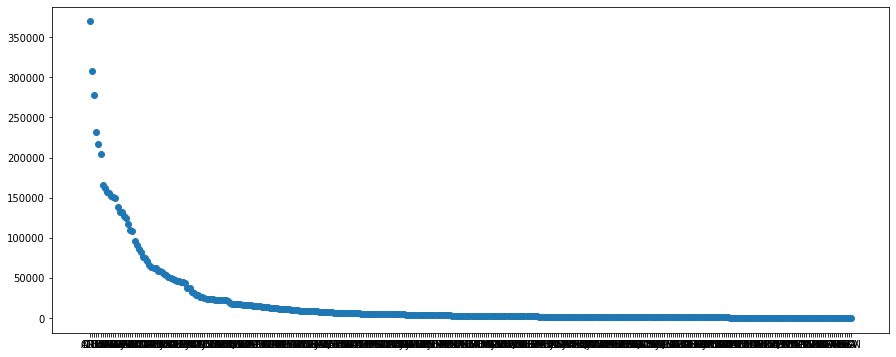

In [ ]:
plot_col = ['Reporting_Airline','Origin','Dest']
for c in plot_col:
  temp_df = df[c].value_counts().rename_axis('unique_values').reset_index(name='counts')
  print("==========" + c + "==========")
  print(temp_df.describe())
  plt.figure(figsize=(15,6))
  plt.scatter(temp_df['unique_values'],temp_df['counts'])
  plt.show()
# origin shorten
origin_grp=df["Origin"].value_counts()<=3000
origin_grp_index=origin_grp[origin_grp==True].index
# print(origin_grp_index)
# dest shorten
dest_grp=df["Dest"].value_counts()<=3000
dest_grp_index=dest_grp[dest_grp==True].index
# print(dest_grp_index)

for i in origin_grp_index:
    df["Origin"]=df["Origin"].replace(i,"OT")

for i in dest_grp_index:
    df["Dest"]=df["Dest"].replace(i,"OT")

del temp_df

###### Check correlation & distribution & outlier

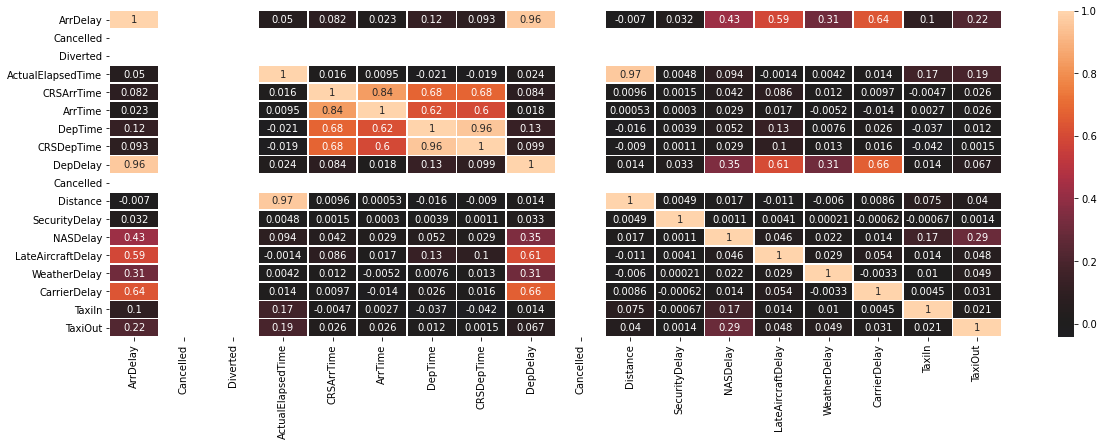

In [ ]:

#Correlation
plt.figure(figsize=(20,6))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0,  annot= True, linewidths=0.8 )

######+ Check for strong correlation variables (excluded ArrDelay)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will b

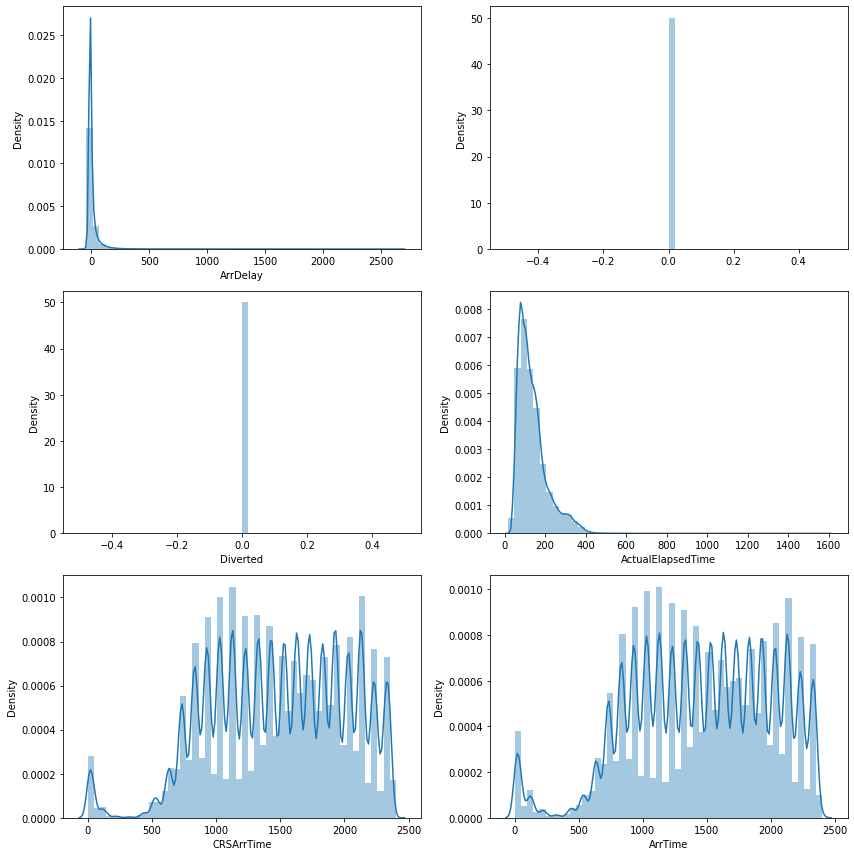

In [ ]:
# distribution
list_of_col = df.select_dtypes(include=['float64','int64']).columns.tolist()
fig,ax = plt.subplots(3,2, figsize=(12,12)) 
i=0 
for x in range(3):
    for y in range(2):
        sns.distplot(df[list_of_col[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

###### add boxplot of target var on dattime and carriers

=========weekday=========


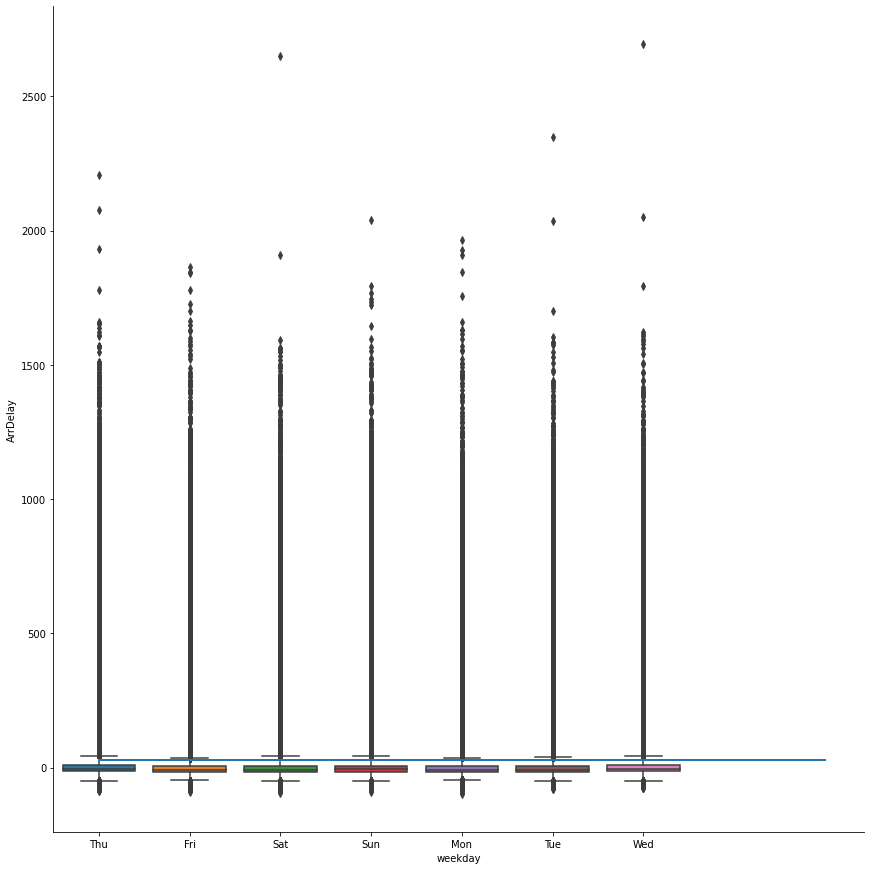

=========weekno=========


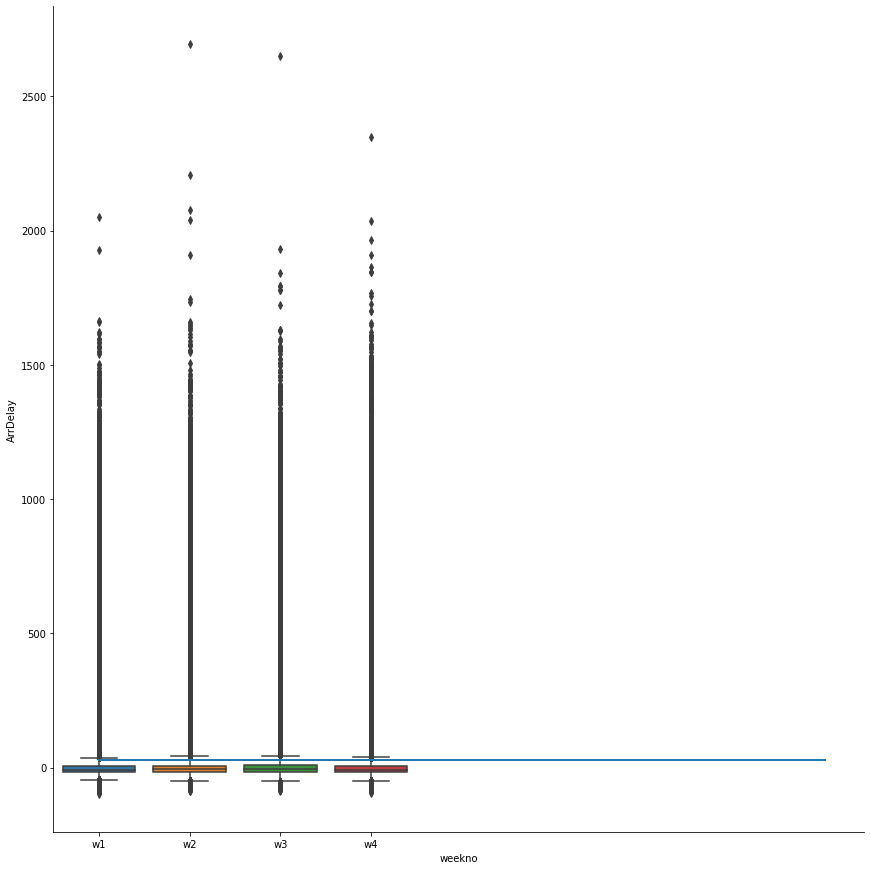

=========season=========


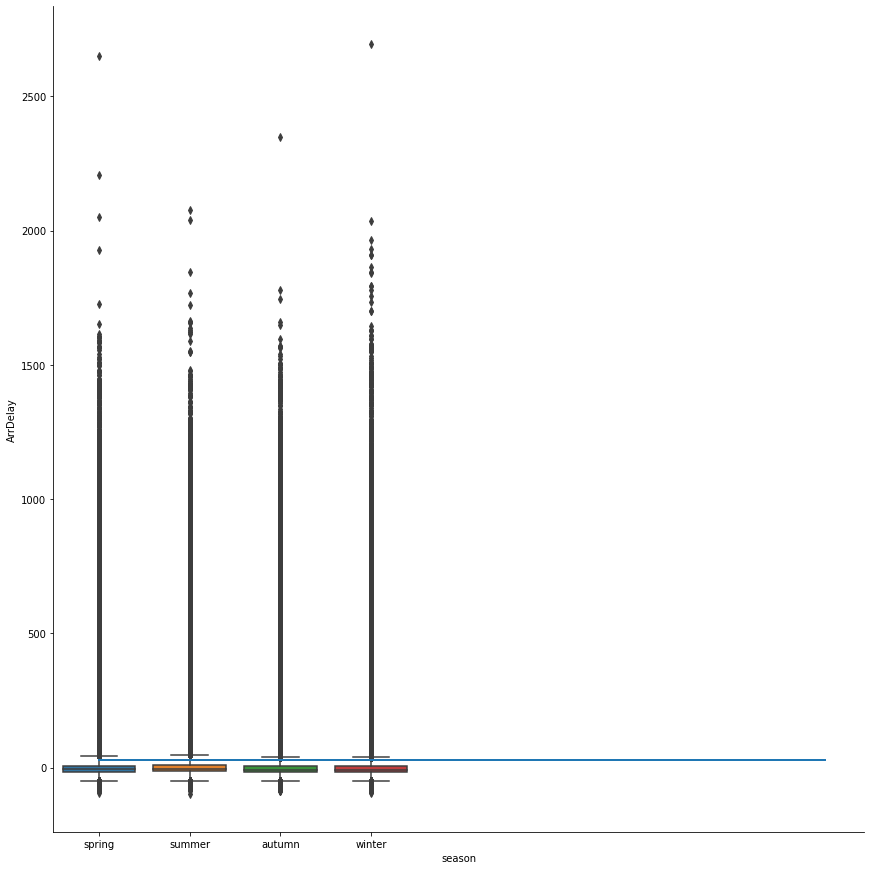

=========Reporting_Airline=========


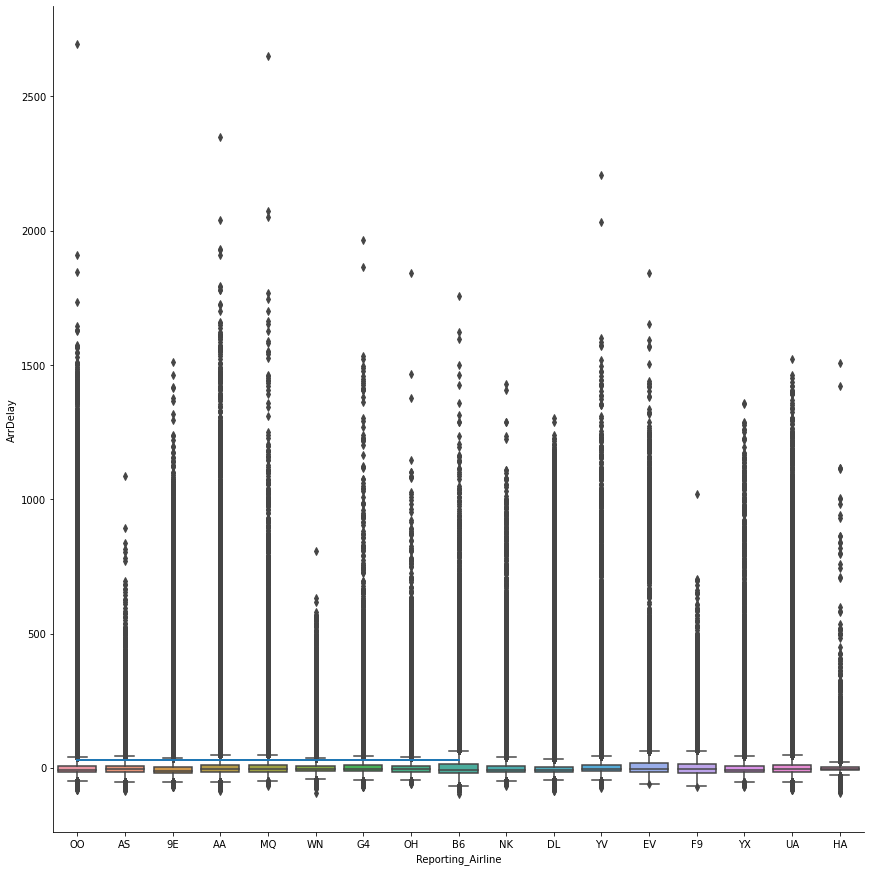

In [ ]:
boxplot_list = ['weekday','weekno','season','Reporting_Airline']
for c in boxplot_list:
  sns.catplot(x=df[c], y=df['ArrDelay'], data=df[df['ArrDelay']<100],height=12,kind='box')
  plt.plot([0, 8], [30,30], linewidth=2)
  print('========='+c+'=========')
  plt.show()

######+ Distribution by ArrDelay mostly not delay (>30 is delay - above blue line) on different level like weekno, weekday, season, airline -> that may cause the imbalancing on event/non-event.

#### 2 + 3 + 4.APPLY MODEL + SELECT FEATURE  + TUNING MODEL

In [ ]:
y=df.ArrDelay.copy()
# x=df.drop(columns=["ArrDelay"])

In [ ]:
y_label=y.copy()
y_label[y_label <30] = 0
y_label[y_label >=30] = 1
y_label.value_counts()/df.shape[0]
# y_label.value_counts()

0.0    0.876044
1.0    0.123956
Name: ArrDelay, dtype: float64

In [ ]:
del y
y_label.value_counts()

0.0    5987682
1.0     847228
Name: ArrDelay, dtype: int64

###### + The class imbalance happen with 88% non-event (no delay) and 12% event (delay) -> undersampling non-event to balance class.

In [ ]:
# Balance class
def late_check(x):
  if int(x)>=30:
    return 1
  else:
    return 0
df['late_status'] = df['ArrDelay'].apply(lambda x: late_check(x))

In [ ]:
non_event = df[df['late_status']==0].sample(n=847228,random_state=100)
event = df[df['late_status']==1]
df_new = non_event.append(event)
del non_event
del event
# del df

In [ ]:
df_new.drop(columns=["ArrDelay"],axis=1,inplace=True)
df_new.columns

Index(['Cancelled', 'Diverted', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime',
       'DepTime', 'CRSDepTime', 'DepDelay', 'Cancelled', 'Distance',
       'Reporting_Airline', 'Origin', 'Dest', 'SecurityDelay', 'NASDelay',
       'LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'TaxiIn',
       'TaxiOut', 'weekday', 'weekno', 'season', 'late_status'],
      dtype='object')

In [ ]:
# hot one encoding
y=df_new.late_status.copy()
x=df_new.drop(columns=["late_status",'Origin','Dest'])
x_enc=pd.get_dummies(x)
del x
print(x_enc.columns)
print(x_enc.shape)
x_enc.head(10)

Index(['Cancelled', 'Diverted', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime',
       'DepTime', 'CRSDepTime', 'DepDelay', 'Cancelled', 'Distance',
       'SecurityDelay', 'NASDelay', 'LateAircraftDelay', 'WeatherDelay',
       'CarrierDelay', 'TaxiIn', 'TaxiOut', 'Reporting_Airline_9E',
       'Reporting_Airline_AA', 'Reporting_Airline_AS', 'Reporting_Airline_B6',
       'Reporting_Airline_DL', 'Reporting_Airline_EV', 'Reporting_Airline_F9',
       'Reporting_Airline_G4', 'Reporting_Airline_HA', 'Reporting_Airline_MQ',
       'Reporting_Airline_NK', 'Reporting_Airline_OH', 'Reporting_Airline_OO',
       'Reporting_Airline_UA', 'Reporting_Airline_WN', 'Reporting_Airline_YV',
       'Reporting_Airline_YX', 'weekday_Fri', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weekno_w1',
       'weekno_w2', 'weekno_w3', 'weekno_w4', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')
(1694456, 49)


,Cancelled,Diverted,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,DepDelay,Cancelled,Distance,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay,TaxiIn,TaxiOut,Reporting_Airline_9E,Reporting_Airline_AA,Reporting_Airline_AS,Reporting_Airline_B6,Reporting_Airline_DL,Reporting_Airline_EV,Reporting_Airline_F9,Reporting_Airline_G4,Reporting_Airline_HA,Reporting_Airline_MQ,Reporting_Airline_NK,Reporting_Airline_OH,Reporting_Airline_OO,Reporting_Airline_UA,Reporting_Airline_WN,Reporting_Airline_YV,Reporting_Airline_YX,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekno_w1,weekno_w2,weekno_w3,weekno_w4,season_autumn,season_spring,season_summer,season_winter
1663250,0,0,228.0,2146,2127.0,1839.0,1845,-6.0,0,1501,0,0,0,0,0,4.0,28.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1068755,0,0,63.0,940,956.0,853.0,830,23.0,0,248,0,0,16,0,0,6.0,17.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1667139,0,0,111.0,1549,1600.0,1309.0,1254,15.0,0,626,0,0,0,0,0,3.0,29.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
591601,0,0,73.0,2111,2118.0,2005.0,1946,19.0,0,335,0,0,0,0,0,4.0,17.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1373914,0,0,266.0,1544,1543.0,1217.0,1222,-5.0,0,1576,0,0,0,0,0,14.0,24.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
35394,0,0,154.0,1422,1356.0,1122.0,1130,-8.0,0,1056,0,0,0,0,0,5.0,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
286551,0,0,59.0,2030,2021.0,1922.0,1920,2.0,0,223,0,0,0,0,0,6.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1027078,0,0,60.0,810,758.0,558.0,600,-2.0,0,271,0,0,0,0,0,5.0,10.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
244668,0,0,223.0,1248,1244.0,601.0,605,-4.0,0,1587,0,0,0,0,0,8.0,17.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
583653,0,0,113.0,1210,1206.0,1013.0,1015,-2.0,0,615,0,0,0,0,0,6.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


##### 1.NAIVE BAYES

###### 1.1 NAIVE BAYES - ORIGINAL

In [219]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x_enc)
print(x_scale)

[[0.         0.         0.13404657 ... 0.         0.         1.        ]
 [0.         0.         0.03020768 ... 0.         0.         0.        ]
 [0.         0.         0.06041536 ... 0.         1.         0.        ]
 ...
 [0.         0.         0.1157961  ... 0.         0.         1.        ]
 [0.         0.         0.03272498 ... 0.         0.         1.        ]
 [0.         0.         0.04594084 ... 0.         0.         1.        ]]


In [ ]:
nb = MultinomialNB()
### HOLD OUT
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3)
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
nb_report = metrics.classification_report(y_test,y_pred)
print(nb_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred,pos_label=nb.classes_[1])
roc_auc = auc(false_positive_rate, true_positive_rate)
LG_gini_nb=2*roc_auc-1
f1_nb=metrics.f1_score(y_test, y_pred)
print("ROC: " + str(roc_auc))
print("F1: " + str(f1_nb))
print("Gini: " + str(LG_gini_nb))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66    254314
           1       0.66      0.73      0.69    254023

    accuracy                           0.68    508337
   macro avg       0.68      0.68      0.68    508337
weighted avg       0.68      0.68      0.68    508337

Confusion matrix
[[158875  95439]
 [ 69054 184969]]
ROC: 0.6764391541871214
F1: 0.6922090971519242
Gini: 0.35287830837424283


In [ ]:
### CROS VALIDATION
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

nested_score = cross_val_score(nb, x_scale, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

           0       0.33      0.50      0.40    169446
           1       0.01      0.01      0.01    169446

    accuracy                           0.25    338892
   macro avg       0.17      0.25      0.20    338892
weighted avg       0.17      0.25      0.20    338892

              precision    recall  f1-score   support

           0       0.44      0.59      0.50    169446
           1       0.38      0.25      0.30    169445

    accuracy                           0.42    338891
   macro avg       0.41      0.42      0.40    338891
weighted avg       0.41      0.42      0.40    338891

              precision    recall  f1-score   support

           0       0.57      0.63      0.60    169446
           1       0.59      0.53      0.56    169445

    accuracy                           0.58    338891
   macro avg       0.58      0.58      0.58    338891
weighted avg       0.58      0.58      0.58    338891

              preci

###### 1.2 NAIVE BAYES - PCA

[5.14384982e-01 2.32923745e-01 1.60002481e-01 5.95708369e-02
 2.25340438e-02 6.56869858e-03 1.83669743e-03 1.06372247e-03
 6.25842091e-04 3.70587979e-04 7.12317472e-05 2.59022782e-05
 1.43164350e-05 4.80114293e-06 1.84656158e-07 1.73565968e-07
 1.62521640e-07 1.55494387e-07 1.53848132e-07 1.48449586e-07]


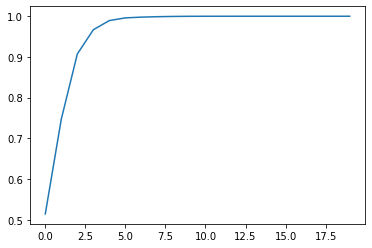

In [ ]:
col_num = len(x_enc.columns)
pca = PCA(n_components=20)
x_pca = x_enc
principalcomps = pca.fit_transform(x_pca)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [ ]:
nb_pca = MultinomialNB()
x_pca_new = pd.DataFrame(data=principalcomps)
x_pca_scale = scaler.fit_transform(x_pca_new)
### HOLD OUT
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca_scale, y, test_size=0.5)
nb.fit(x_train_pca,y_train_pca)
y_pred_pca = nb.predict(x_test_pca)
nb_report_pca = metrics.classification_report(y_test_pca,y_pred_pca)
print(nb_report_pca)
print('Confusion matrix')
print(confusion_matrix(y_test_pca,y_pred_pca))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_pca, y_pred_pca)
roc_auc_pca = auc(false_positive_rate, true_positive_rate)
LG_gini_nb_pca=2*roc_auc_pca-1
f1_nb_pca=metrics.f1_score(y_test_pca, y_pred_pca)
print("ROC_PCA: " + str(roc_auc_pca))
print("F1_PCA: " + str(f1_nb_pca))
print("Gini_PCA: " + str(LG_gini_nb_pca))
x_pca_new.shape

              precision    recall  f1-score   support

           0       0.67      0.64      0.65    423488
           1       0.65      0.69      0.67    423740

    accuracy                           0.66    847228
   macro avg       0.66      0.66      0.66    847228
weighted avg       0.66      0.66      0.66    847228

Confusion matrix
[[269146 154342]
 [133103 290637]]
ROC_PCA: 0.6607154829964689
F1_PCA: 0.6691162504791538
Gini_PCA: 0.32143096599293774


(1694456, 20)

###### 1.3 NAIVE BAYES - SelectKBest

In [ ]:
nb_kbest = MultinomialNB()
nb_kbest_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k=20)),('nb_clf', nb_kbest)])
nb_kbest_clf.fit(x_train,y_train)
y_pred_knest = nb_kbest_clf.predict(x_test)
nb_report_kbest = metrics.classification_report(y_test,y_pred_knest)
print(nb_report_kbest)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_knest))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knest)
roc_auc_kbest = auc(false_positive_rate, true_positive_rate)
LG_gini_nb_kbest=2*roc_auc_kbest-1
f1_nb_kbest=metrics.f1_score(y_test, y_pred_knest)
print("ROC_SelectKBest: " + str(roc_auc_kbest))
print("F1_SelectKBest: " + str(f1_nb_kbest))
print("Gini_SelectKBest: " + str(LG_gini_nb_kbest))

              precision    recall  f1-score   support

           0       0.65      0.55      0.59    254020
           1       0.61      0.70      0.65    254317

    accuracy                           0.62    508337
   macro avg       0.63      0.62      0.62    508337
weighted avg       0.63      0.62      0.62    508337

Confusion matrix
[[139615 114405]
 [ 76513 177804]]
ROC_SelectKBest: 0.624382636152655
F1_SelectKBest: 0.6506698674902933
Gini_SelectKBest: 0.24876527230530998


###### 1.4 NAIVE BAYES - RFE

In [ ]:
nb_rfe = MultinomialNB()
nb_rfe_clf = Pipeline([('rfe', RFE(nb_rfe,n_features_to_select=20)),('nb_clf', nb_rfe)])
nb_rfe_clf.fit(x_train,y_train)
y_pred_rfe = nb_rfe_clf.predict(x_test)
nb_report_rfe = metrics.classification_report(y_test,y_pred_rfe)
print(nb_report_rfe)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_rfe))  
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfe)
roc_auc_rfe = auc(false_positive_rate, true_positive_rate)
LG_gini_nb_rfe=2*roc_auc_rfe-1
f1_nb_rfe=metrics.f1_score(y_test, y_pred_rfe)
print("ROC_RFE: " + str(roc_auc_rfe))
print("F1_RFE: " + str(f1_nb_rfe))
print("Gini_RFE: " + str(LG_gini_nb_rfe))

              precision    recall  f1-score   support

           0       0.76      0.46      0.57    254020
           1       0.61      0.85      0.71    254317

    accuracy                           0.66    508337
   macro avg       0.68      0.66      0.64    508337
weighted avg       0.68      0.66      0.64    508337

Confusion matrix
[[116415 137605]
 [ 37239 217078]]
ROC_RFE: 0.6559315978359184
F1_RFE: 0.7128998357963875
Gini_RFE: 0.31186319567183673


###### 1.5 NAIVE BAYES - GridSearchCV Tuning model

In [ ]:
nb_ = MultinomialNB()
parameters = { 'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}
nb_tuning = GridSearchCV(nb_, parameters, n_jobs=-1)   
nb_tuning.fit(x_train, y_train)
y_pred_grid = nb_tuning.predict(x_test)
nb_report_grid = metrics.classification_report(y_test,y_pred_grid)
print(nb_report_grid)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_grid))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_grid,pos_label=nb_tuning.classes_[1])
roc_auc_grid = auc(false_positive_rate, true_positive_rate)
LG_gini_nb_grid=2*roc_auc_grid-1
f1_nb_grid=metrics.f1_score(y_test, y_pred_grid)
print("ROC: " + str(roc_auc_grid))
print("F1: " + str(f1_nb_grid))
print("Gini: " + str(LG_gini_nb_grid))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66    254314
           1       0.66      0.73      0.69    254023

    accuracy                           0.68    508337
   macro avg       0.68      0.68      0.68    508337
weighted avg       0.68      0.68      0.68    508337

Confusion matrix
[[158869  95445]
 [ 68968 185055]]
ROC: 0.6765966337569407
F1: 0.6924117390645492
Gini: 0.35319326751388136


In [ ]:
print("========CONCLUSION FOR NAIVE BAYES========")
print('========Naive Bayes - Orginal========')
print("*****ROC: " + str(roc_auc))
print("*****F1: " + str(f1_nb))
print("*****Gini: " + str(LG_gini_nb))

print('========Naive Bayes - PCA========')
print("*****ROC: " + str(roc_auc_pca))
print("*****F1: " + str(f1_nb_pca))
print("*****Gini: " + str(LG_gini_nb_pca))

print('========Naive Bayes - SelectKBest========')
print("*****ROC: " + str(roc_auc_kbest))
print("*****F1: " + str(f1_nb_kbest))
print("*****Gini: " + str(LG_gini_nb_kbest))

print('========Naive Bayes - RFE========')
print("*****ROC: " + str(roc_auc_rfe))
print("*****F1: " + str(f1_nb_rfe))
print("*****Gini: " + str(LG_gini_nb_rfe))

print('========Naive Bayes - GridSearchCV========')
print("*****ROC: " + str(roc_auc_grid))
print("*****F1: " + str(f1_nb_grid))
print("*****Gini: " + str(LG_gini_nb_grid))

========CONCLUSION FOR NAIVE BAYES========
========Naive Bayes - Orginal========
*****ROC: 0.6771317789613271
*****F1: 0.6926627925921903
*****Gini: 0.3542635579226543
========Naive Bayes - PCA========
*****ROC: 0.6607154829964689
*****F1: 0.6691162504791538
*****Gini: 0.32143096599293774
========Naive Bayes - SelectKBest========
*****ROC: 0.624382636152655
*****F1: 0.6506698674902933
*****Gini: 0.24876527230530998
========Naive Bayes - RFE========
*****ROC: 0.6559315978359184
*****F1: 0.7128998357963875
*****Gini: 0.31186319567183673
========Naive Bayes - GridSearchCV========
*****ROC: 0.677291019836304
*****F1: 0.6926627925921903
*****Gini: 0.35458203967260804


######+ In conclusion, Naive Bayes with tuning by GridSearch has the best perfromance among all with ROC & GINI higher and F1 is not different from others method

##### 2. LOGISTIC REGRESSION

###### 2.1 LG - ORGINAL

In [ ]:
scaler = MinMaxScaler()
x_new = x_enc.drop(columns=['CarrierDelay','DepDelay','SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay','Cancelled'])
x_scale_lg = scaler.fit_transform(x_new)
x_scale_lg.shape

(1694456, 41)

In [216]:
lg = LogisticRegression()
### HOLD OUT
x_train, x_test, y_train, y_test = train_test_split(x_scale_lg, y, test_size=0.3)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
lg_report = metrics.classification_report(y_test,y_pred)
print(lg_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_lg = auc(false_positive_rate, true_positive_rate)
lg_gini=2*roc_auc_lg-1
f1_lg=metrics.f1_score(y_test, y_pred)
print("ROC: " + str(roc_auc_lg))
print("F1: " + str(f1_lg))
print("Gini: " + str(lg_gini))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.68      0.73      0.71    254554
           1       0.71      0.66      0.68    253783

    accuracy                           0.69    508337
   macro avg       0.70      0.69      0.69    508337
weighted avg       0.70      0.69      0.69    508337

Confusion matrix
[[186235  68319]
 [ 87079 166704]]
ROC: 0.6942445444026112
F1: 0.6820865537657067
Gini: 0.38848908880522237


In [ ]:
nested_score_lg = cross_val_score(lg, x_scale_lg, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score_lg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.45      0.70      0.55    169446
           1       0.32      0.14      0.20    169446

    accuracy                           0.42    338892
   macro avg       0.39      0.42      0.37    338892
weighted avg       0.39      0.42      0.37    338892



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.57      0.73      0.64    169446
           1       0.62      0.44      0.51    169445

    accuracy                           0.58    338891
   macro avg       0.59      0.58      0.58    338891
weighted avg       0.59      0.58      0.58    338891



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.67      0.75      0.71    169446
           1       0.72      0.63      0.67    169445

    accuracy                           0.69    338891
   macro avg       0.69      0.69      0.69    338891
weighted avg       0.69      0.69      0.69    338891



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.51      0.72      0.60    169445
           1       0.53      0.32      0.40    169446

    accuracy                           0.52    338891
   macro avg       0.52      0.52      0.50    338891
weighted avg       0.52      0.52      0.50    338891



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.42      0.70      0.53    169445
           1       0.14      0.05      0.07    169446

    accuracy                           0.37    338891
   macro avg       0.28      0.37      0.30    338891
weighted avg       0.28      0.37      0.30    338891

[0.42202531 0.5844298  0.69002718 0.51919939 0.37221112]


###### 2.2 LG - PCA

[5.19669118e-01 2.35344713e-01 1.61548455e-01 6.01849279e-02
 2.27121845e-02 4.41667490e-04 7.20444054e-05 2.47519207e-05
 1.86608361e-07 1.75446156e-07]


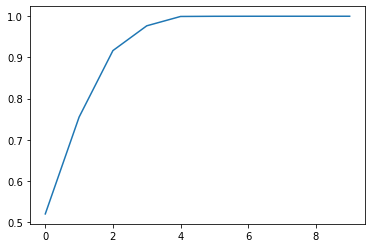

In [ ]:
col_num = len(x_new.columns)
lg_pca = PCA(n_components=10)
x_pca_lg = x_new
principalcomps_lg = lg_pca.fit_transform(x_pca_lg)
print(lg_pca.explained_variance_ratio_)
plt.plot(lg_pca.explained_variance_ratio_.cumsum())
plt.show()

In [ ]:
lg_pca = LogisticRegression()
x_lg_pca_new = pd.DataFrame(data=principalcomps_lg)
x_lg_pca_scale = scaler.fit_transform(x_lg_pca_new)
### HOLD OUT
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_lg_pca_scale, y, test_size=0.5)
lg_pca.fit(x_train_pca,y_train_pca)
y_pred_pca = lg_pca.predict(x_test_pca)
lg_report_pca = metrics.classification_report(y_test_pca,y_pred_pca)
print(lg_report_pca)
print('Confusion matrix')
print(confusion_matrix(y_test_pca,y_pred_pca))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_pca, y_pred_pca)
roc_auc_lg_pca = auc(false_positive_rate, true_positive_rate)
lg_gini_pca=2*roc_auc_lg_pca-1
f1_lg_pca=metrics.f1_score(y_test_pca, y_pred_pca)
print("ROC_PCA: " + str(roc_auc_lg_pca))
print("F1_PCA: " + str(f1_lg_pca))
print("Gini_PCA: " + str(lg_gini_pca))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.68      0.73      0.70    422897
           1       0.71      0.65      0.68    424331

    accuracy                           0.69    847228
   macro avg       0.69      0.69      0.69    847228
weighted avg       0.69      0.69      0.69    847228

Confusion matrix
[[310698 112199]
 [149287 275044]]
ROC_PCA: 0.6914361015247893
F1_PCA: 0.6778038724749685
Gini_PCA: 0.3828722030495786


###### 2.3 LG - SelectKBest

In [ ]:
lg_kbest = LogisticRegression()
lg_kbest_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k=20)),('lg_clf', lg_kbest)])
lg_kbest_clf.fit(x_train,y_train)
y_pred_kbest = lg_kbest_clf.predict(x_test)
lg_report_kbest = metrics.classification_report(y_test,y_pred_kbest)
print(lg_report_kbest)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_kbest))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_kbest)
roc_lg_auc_kbest = auc(false_positive_rate, true_positive_rate)
lg_gini_kbest=2*roc_lg_auc_kbest-1
f1_lg_kbest=metrics.f1_score(y_test, y_pred_kbest)
print("ROC_SelectKBest: " + str(roc_lg_auc_kbest))
print("F1_SelectKBest: " + str(f1_lg_kbest))
print("Gini_SelectKBest: " + str(lg_gini_kbest))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70    254062
           1       0.71      0.65      0.68    254275

    accuracy                           0.69    508337
   macro avg       0.69      0.69      0.69    508337
weighted avg       0.69      0.69      0.69    508337

Confusion matrix
[[186090  67972]
 [ 89332 164943]]
ROC_SelectKBest: 0.6905692926325687
F1_SelectKBest: 0.6771198095198998
Gini_SelectKBest: 0.38113858526513744


###### 2.4 LG - RFE

In [ ]:
lg_rfe = LogisticRegression()
lg_rfe_clf = Pipeline([('rfe', RFE(lg_rfe,n_features_to_select=20)),('lg_clf', lg_rfe)])
lg_rfe_clf.fit(x_train,y_train)
y_pred_rfe = lg_rfe_clf.predict(x_test)
lg_report_rfe = metrics.classification_report(y_test,y_pred_rfe)
print(lg_report_rfe)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_rfe))  
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfe)
roc_lg_auc_rfe = auc(false_positive_rate, true_positive_rate)
lg_gini_rfe=2*roc_lg_auc_rfe-1
f1_lg_rfe=metrics.f1_score(y_test, y_pred_rfe)
print("ROC_RFE: " + str(roc_lg_auc_rfe))
print("F1_RFE: " + str(f1_lg_rfe))
print("Gini_RFE: " + str(lg_gini_rfe))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.68      0.73      0.70    254062
           1       0.71      0.66      0.69    254275

    accuracy                           0.69    508337
   macro avg       0.70      0.70      0.69    508337
weighted avg       0.70      0.69      0.69    508337

Confusion matrix
[[184409  69653]
 [ 85396 168879]]
ROC_RFE: 0.6950006969910887
F1_RFE: 0.685375816496113
Gini_RFE: 0.39000139398217737


###### 2.4 LG - GridSearchCV Tuning model

In [217]:
lg_ = LogisticRegression()
parameters = {'tol':[0.01, 0.001],'C':[0.1,5,10]}
lg_tuning = GridSearchCV(lg_, parameters)   
lg_tuning.fit(x_train, y_train)
y_pred_grid = lg_tuning.predict(x_test)
lg_report_grid = metrics.classification_report(y_test,y_pred_grid)
print(lg_report_grid)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_grid))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_grid)
roc_lg_auc_grid = auc(false_positive_rate, true_positive_rate)
lg_gini_grid=2*roc_lg_auc_grid-1
f1_lg_grid=metrics.f1_score(y_test, y_pred_grid)
print("ROC: " + str(roc_lg_auc_grid))
print("F1: " + str(f1_lg_grid))
print("Gini: " + str(lg_gini_grid))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.69      0.73      0.71    254554
           1       0.71      0.66      0.69    253783

    accuracy                           0.70    508337
   macro avg       0.70      0.70      0.70    508337
weighted avg       0.70      0.70      0.70    508337

Confusion matrix
[[186473  68081]
 [ 85303 168480]]
ROC: 0.6982110810484865
F1: 0.6871910332338114
Gini: 0.396422162096973


In [218]:
print("========CONCLUSION FOR LOGISTIC REGRESSION========")
print('========LG - Orginal========')
print("*****ROC: " + str(roc_auc_lg))
print("*****F1: " + str(f1_lg))
print("*****Gini: " + str(lg_gini))

print('========LG - PCA========')
print("*****ROC_PCA: " + str(roc_auc_lg_pca))
print("*****F1_PCA: " + str(f1_lg_pca))
print("*****Gini_PCA: " + str(lg_gini_pca))

print('========LG - SelectKBest========')
print("*****ROC_SelectKBest: " + str(roc_lg_auc_kbest))
print("*****F1_SelectKBest: " + str(f1_lg_kbest))
print("*****Gini_SelectKBest: " + str(lg_gini_kbest))

print('========LG - RFE========')
print("*****ROC_RFE: " + str(roc_lg_auc_rfe))
print("*****F1_RFE: " + str(f1_lg_rfe))
print("*****Gini_RFE: " + str(lg_gini_rfe))

print('========LG - GridSearchCV========')
print("*****ROC: " + str(roc_lg_auc_grid))
print("*****F1: " + str(f1_lg_grid))
print("*****Gini: " + str(lg_gini_grid))

========CONCLUSION FOR LOGISTIC REGRESSION========
========LG - Orginal========
*****ROC: 0.6942445444026112
*****F1: 0.6820865537657067
*****Gini: 0.38848908880522237
========LG - PCA========
*****ROC_PCA: 0.6914361015247893
*****F1_PCA: 0.6778038724749685
*****Gini_PCA: 0.3828722030495786
========LG - SelectKBest========
*****ROC_SelectKBest: 0.6905692926325687
*****F1_SelectKBest: 0.6771198095198998
*****Gini_SelectKBest: 0.38113858526513744
========LG - RFE========
*****ROC_RFE: 0.6950006969910887
*****F1_RFE: 0.685375816496113
*****Gini_RFE: 0.39000139398217737
========LG - GridSearchCV========
*****ROC: 0.6982110810484865
*****F1: 0.6871910332338114
*****Gini: 0.396422162096973


##### 3. DECISION TREE

###### 3.1 DT - ORGINAL

In [1]:
dt = DecisionTreeClassifier()
### HOLD OUT
x_train, x_test, y_train, y_test = train_test_split(x_scale_lg, y, test_size=0.3)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dt_report = metrics.classification_report(y_test,y_pred)
print(nb_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_dt_auc = auc(false_positive_rate, true_positive_rate)
dt_gini=2*roc_dt_auc-1
dt_f1=metrics.f1_score(y_test, y_pred)
print("ROC: " + str(roc_dt_auc))
print("F1: " + str(dt_f1))
print("Gini: " + str(dt_gini))

NameError: ignored